В данном проекте проводится исследовательский анализ на основе набора данных о продажах интернет-магазина электроники.
Цель исследования — выявить закономерности в поведении покупателей и определить ключевые факторы, влияющие на продажи.

Основные задачи:

Загрузка и первичное ознакомление с данными.

Анализ структуры и типов данных, проверка на наличие пропусков.

Исследование распределения покупателей по полу, возрасту и категориям товаров.

Анализ динамики продаж и средних чеков.

Проверка статистических гипотез (например, различий между группами).

Визуализация результатов с помощью matplotlib и seaborn.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

## 1) Загрузите данные из файла csv, прикрепленному к заданию.
## 2) Замерьте время отработки ячейки импорта данных

In [4]:
%time # Измеряем время выполнения загрузки данных
df = pd.read_csv('electronics_sales_dataset.csv') # Читаем CSV-файл с данными о продажах интернет-магазина
df # Отображаем первые строки датафрейма, чтобы убедиться, что данные загружены корректно

CPU times: total: 0 ns
Wall time: 0 ns


,client_id,age,gender,product,product_category,purchased_quantity,price,purchase_date
0,1,50,Female,games,games,10,47,2023-02-02
1,2,31,Male,TV,TV,2,1083,2023-07-08
2,3,33,Male,laptop,laptop,5,1436,2023-06-06
3,4,39,Male,smart-watches,smart-watches,9,80,2022-11-22
4,5,49,Female,laptop,laptop,1,1030,2023-05-04
...,...,...,...,...,...,...,...,...
499995,499996,50,Female,case,case,8,10,2023-07-01
499996,499997,42,Male,TV,TV,1,2976,2023-01-21
499997,499998,37,Female,TV,TV,3,3143,2024-02-16
499998,499999,50,Male,smartphone,smartphone,10,749,2024-01-02


## 3) Опишите ваши данные (Строки и колонки)

In [6]:
df.info() # Получаем общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   client_id           500000 non-null  int64 
 1   age                 500000 non-null  int64 
 2   gender              500000 non-null  object
 3   product             500000 non-null  object
 4   product_category    500000 non-null  object
 5   purchased_quantity  500000 non-null  int64 
 6   price               500000 non-null  int64 
 7   purchase_date       500000 non-null  object
dtypes: int64(4), object(4)
memory usage: 30.5+ MB


В данной таблице находятся 8 столбцов и 500 тысяч строк. Все строки и столбцы заполнены данными, нулевых значений нет. В столбцах хранятся: id клиентов, их возрасты, пол, а также название продукта, категории продуктов, количество купленных продуктов, их цена и дата покупки.
Данные состоят из двух типов данных: int64 и object.

## 4) Посчитайте количество покупателей по полам и визуализируйте ваши подсчеты на круговой диаграмме (Pie Chart)

In [9]:
genders = df.groupby('gender').agg({'client_id':'nunique'}).reset_index() # Группируем данные по полу покупателей и для каждой группы считаем количество уникальных клиентов (client_id)
genders # Отображаем полученную таблицу с числом покупателей по каждому полу

,gender,client_id
0,Female,249815
1,Male,250185


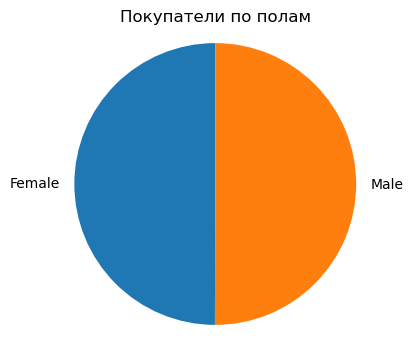

In [10]:
plt.figure(figsize=(4, 4)) # Создаём фигуру для визуализации и задаём размер графика
plt.pie(genders['client_id'], labels=genders['gender'], startangle=90) # Строим круговую диаграмму (Pie Chart)
plt.title('Покупатели по полам') # Добавляем заголовок диаграммы
plt.axis('equal') # Устанавливаем равные оси, чтобы круг был ровным
plt.show() # Отображаем итоговую диаграмму

## 5) Опишите ваши выводы из построенной диаграммы

Так как разница между покупателямии двух полов незначительная, обе части диаграммы выглядят почти одинаково.

## 6) Постройте график, который будет отображать количество покупателей по возрастам и покажет частоту встречающихся значений.

In [14]:
ages = df.groupby('age').agg({'client_id':'count'}).reset_index() # Группируем данные по возрасту покупателей и для каждого возраста считаем количество клиентов (client_id)

In [15]:
ages.head() # Отображаем первые 5 строк полученной таблицы,чтобы убедиться, что группировка по возрасту выполнена корректно

,age,client_id
0,15,13955
1,16,13889
2,17,14064
3,18,13912
4,19,13976


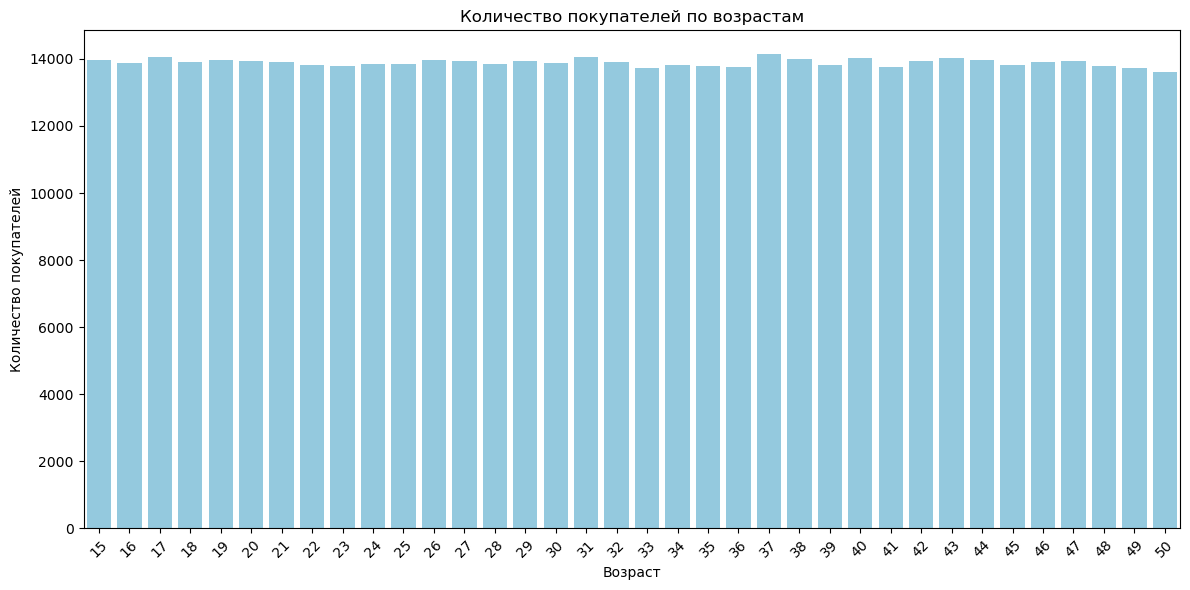

In [16]:
plt.figure(figsize=(12, 6)) # Создаём фигуру для визуализации и задаём размер графика
sns.barplot(data=ages, x='age', y='client_id', color='skyblue') # Строим столбчатую диаграмму, показывающую количество покупателей в каждом возрасте
plt.title('Количество покупателей по возрастам') # Добавляем заголовок и подписи осей
plt.xlabel('Возраст')
plt.ylabel('Количество покупателей')
plt.xticks(rotation=45) # Поворачиваем подписи на оси X для удобства чтения
plt.tight_layout() # Автоматически регулируем отступы, чтобы элементы не налезали друг на друга
plt.show() # Отображаем итоговый график

## 7) Опишите ваши выводы из построенного графика

Покупателей примерно одинаково во всех возрастах от 15 до 50 лет. Столбики почти на одном уровне: от 13800 до 14200, поэтому сильных всплесков или провалов нет.
Никакая возрастная группа не выделяется - все представлены примерно одинаково. Это значит, что возраст особо не влияет на то, сколько людей в выборке.

## 8) Постройте график сумм продаж по датам, чтобы показать динамику выручки по месяцам. 

In [20]:
df['purchase_date'] = pd.to_datetime(df['purchase_date']) # Преобразуем столбец 'purchase_date' в формат даты и времени (datetime)

In [21]:
df['revenue'] = df['price'] * df['purchased_quantity'] # Создаём новый столбец 'revenue' (выручка)

In [22]:
df['month'] = df['purchase_date'].dt.to_period('M').astype(str) # Извлекаем из даты месяц и год покупки

In [23]:
monthly_revenue = df.groupby('month')['revenue'].sum().reset_index()  # Группируем данные по месяцам и рассчитываем суммарную выручку за каждый месяц

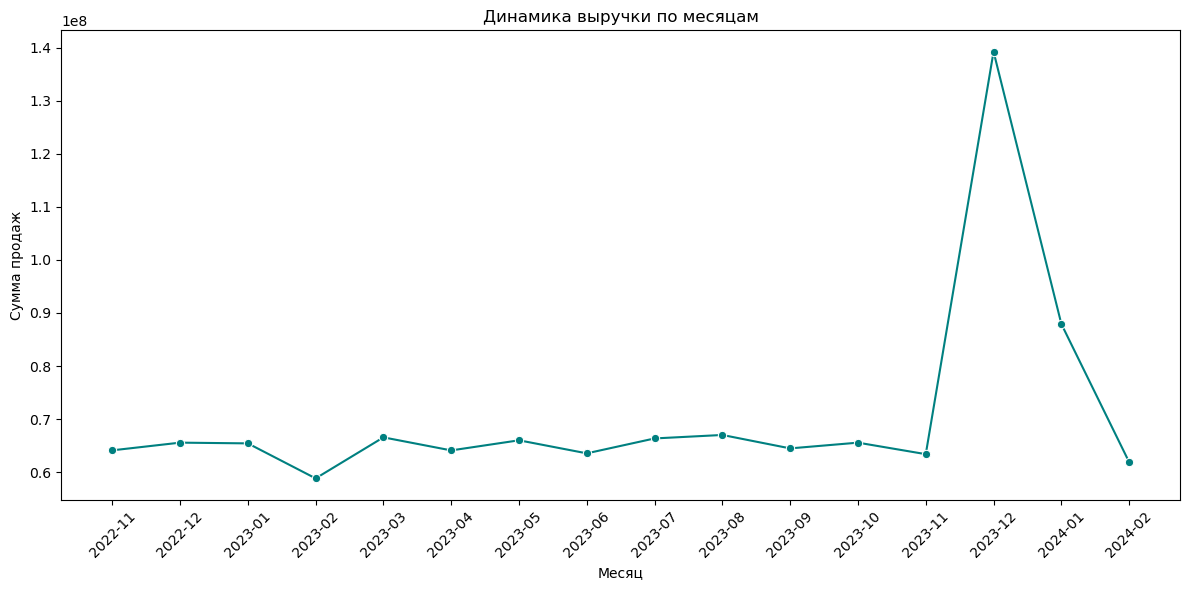

In [24]:
plt.figure(figsize=(12, 6)) # Создаём фигуру для визуализации и задаём размер графика
sns.lineplot(data=monthly_revenue, x='month', y='revenue', marker='o', color='teal') # Строим линейный график динамики выручки по месяцам
plt.title('Динамика выручки по месяцам') # Добавляем заголовок и подписи осей
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45) # Поворачиваем подписи месяцев для удобства чтения
plt.tight_layout() # Автоматически регулируем отступы, чтобы элементы графика не накладывались
plt.show() # Отображаем итоговый график

## 9) Опишите ваши выводы

В течение года выручка была на устойчивом уровне, но в декабре 2023 года случился резкий пик продаж. Это может быть связано с праздничным сезоном и новогодними распродажами. После декабря уровень снова потихоньку падает до изначального уровня.

## 10) Постройте график по количествам продаж, сгруппированных по полам. То есть одна шкала продажи по мужчинам, вторая по женщинам. Данный график должен показывать динамику количества продаж по полам, в течении определенного периода.

In [28]:
gender_monthly_sales = df.groupby(['month', 'gender'])['purchased_quantity'].sum().reset_index() # Группируем данные по месяцам и полу покупателей
# Для каждой комбинации (месяц + пол) считаем общее количество купленных товаров

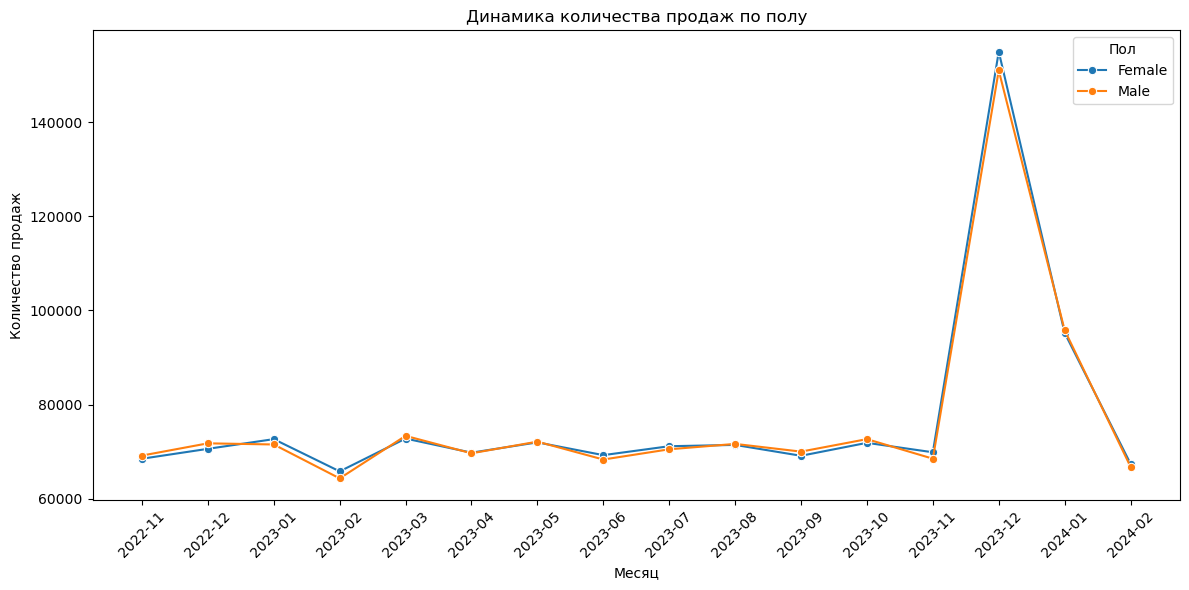

In [29]:
plt.figure(figsize=(12, 6)) # Создаём фигуру и задаём размер графика
sns.lineplot(data=gender_monthly_sales, x='month', y='purchased_quantity', hue='gender', marker='o') # Строим линейный график динамики количества продаж по месяцам с разбивкой по полу
plt.title('Динамика количества продаж по полу') # Добавляем заголовок и подписи осей
plt.xlabel('Месяц')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45) # Поворачиваем подписи на оси X для удобства чтения
plt.legend(title='Пол') # Добавляем легенду с заголовком "Пол"
plt.tight_layout() # Автоматически регулируем отступы, чтобы элементы не накладывались
plt.show() # Отображаем итоговый график

## 11) Проверьте следующие гипотезы:
H1 - Возраст стат. значимо влияет на количество продаж
H0 - Возраст стат. значимо не влияет на количество продаж
Гипотеза 2:

H1 - Пол стат. значимо влияет на количество продаж
H0 - Пол стат. значимо не влияет на количество продаж

In [31]:
median_age = df['age'].median() # Находим медианный возраст покупателей
age1 = df[df['age'] < median_age]['purchased_quantity'] # age1 - покупатели младше медианного возраста
age2 = df[df['age'] >= median_age]['purchased_quantity'] # age2 - покупатели старше или равны медианному возрасту
median_age # Отображаем значение медианного возраста

32.0

In [32]:
stat_age, p_age = mannwhitneyu(age1, age2, alternative='two-sided') # Выполняем тест Манна–Уитни для сравнения двух возрастных групп
print(f'Возраст: статистика={stat_age}, p-value={p_age}')

if p_age < 0.05:
    print("Возраст влияет на количество продаж.")
else:
    print("Возраст не влияет на количество продаж.") # Если p-value < 0.05, различия между группами статистически значимы

Возраст: статистика=31194008087.5, p-value=0.4971745850576781
Возраст не влияет на количество продаж.


In [33]:
male = df[df['gender'] == 'Male']['purchased_quantity'] # male - количество покупок у мужчин
female = df[df['gender'] == 'Female']['purchased_quantity'] # female - количество покупок у женщин

In [34]:
stat_gender, p_gender = mannwhitneyu(male, female, alternative='two-sided') # Проводим тест Манна–Уитни для сравнения количества покупок между мужчинами и женщинами
print(f'Пол: статистика={stat_gender}, p-value={p_gender}')

if p_gender < 0.05:
    print("Пол влияет на количество продаж.")
else:
    print("пол не влияет на количество продаж.") # Если p-value < 0.05, различия между мужчинами и женщинами статистически значимы

Пол: статистика=31141328019.5, p-value=0.03186719147544529
Пол влияет на количество продаж.


## 12) Опишите почему вы выбрали определенный тип теста (Стьюдента, Манна Уитни итд.) для проверки гипотез.

Для проверки гипотез был выбран тест Манна–Уитни, так как он позволяет сравнивать выборки в случае, когда нет нормального распределения и содержатся выбросы. 

## 13) Напишите финальный вывод, с вашим заключением из проверенных гипотез.

В исследовании участвовало примерно одинаковое коичество покупателей обоих полов. Их возрасты почти одинаково расределены от 15 до 50 лет.
Продажи в основном стабильные, за исключением декабря 2023 года, когда продажи резко возросли. По графику количества продаж по полам видно, что это актуально и для женщин, и для  мужчин.
Проверка гипотез показала, что возраст не имеет значительного влияния на количество продаж, а пол имеет.